# Table Of Content



    a. INTRODUCTION

    b. IMPORTING LIBRARIES AND LOADING DATASET

    c. DATA CLEANING

    d. EXPLORATORY DATA ANALYSIS

    e. FEATURE ENGINEERING

    f. TRAIN TEST SPLIT
    
    g. MODEL BUILDING
    
    h. MODEL EVALUATION
    
    i. SQL QUESTIONIARE



## a) Introduction

**The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020.**


A. Basic information:

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)

B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 

C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).

D. Covid report

11. Corona positive or negative

## b) Importing Libraries and loading dataset

In [1]:
# importing all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# setting max display column limit to 20
pd.set_option("display.max_columns", 20)

# setting spines off for better visualization
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score, roc_curve

In [3]:
covid = pd.read_csv("/home/aquib/Desktop/Capstone_Project_2/corona_tested_006.csv")  #loading the dataset
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
covid.shape   #Numbers of rows and columns

(278848, 11)

In [5]:
covid.info()  #descriptive statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [6]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [7]:
covid.describe(include='all')   #descriptive statistics

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
covid.nunique()   #number of unique values

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

## c) Data Cleaning

In [9]:
import regex

In [10]:
def clean_it(value):
    value = str(value).replace("[^a-zA-Z]", "")
    return value.lower()

In [11]:
#data cleaning and transformation
columns = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex']

for column in columns:
    covid[column] = covid[column].apply(clean_it)
    covid[column] = covid[column].replace(r'none', np.nan, regex=True)

In [12]:
for column in columns:
    print(column,': ',covid[column].unique())

Cough_symptoms :  ['true' 'false' nan]
Fever :  ['false' 'true' nan]
Sore_throat :  ['true' 'false' nan]
Shortness_of_breath :  ['false' 'true' nan]
Headache :  ['false' 'true' nan]
Age_60_above :  [nan 'no' 'yes']
Sex :  [nan 'male' 'female']


In [13]:
covid['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [14]:
covid['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [15]:
covid['Known_contact']=covid.Known_contact.map( {'Contact with confirmed':'true', 'Abroad':'false','Other':'false'})

In [16]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,false
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,false
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,false
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,false
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,true


In [17]:
covid.shape

(278848, 11)

In [18]:
indexAge = covid[covid['Corona'] =='other' ].index  # droping rows 

df = covid.drop(indexAge).copy()

<AxesSubplot:>

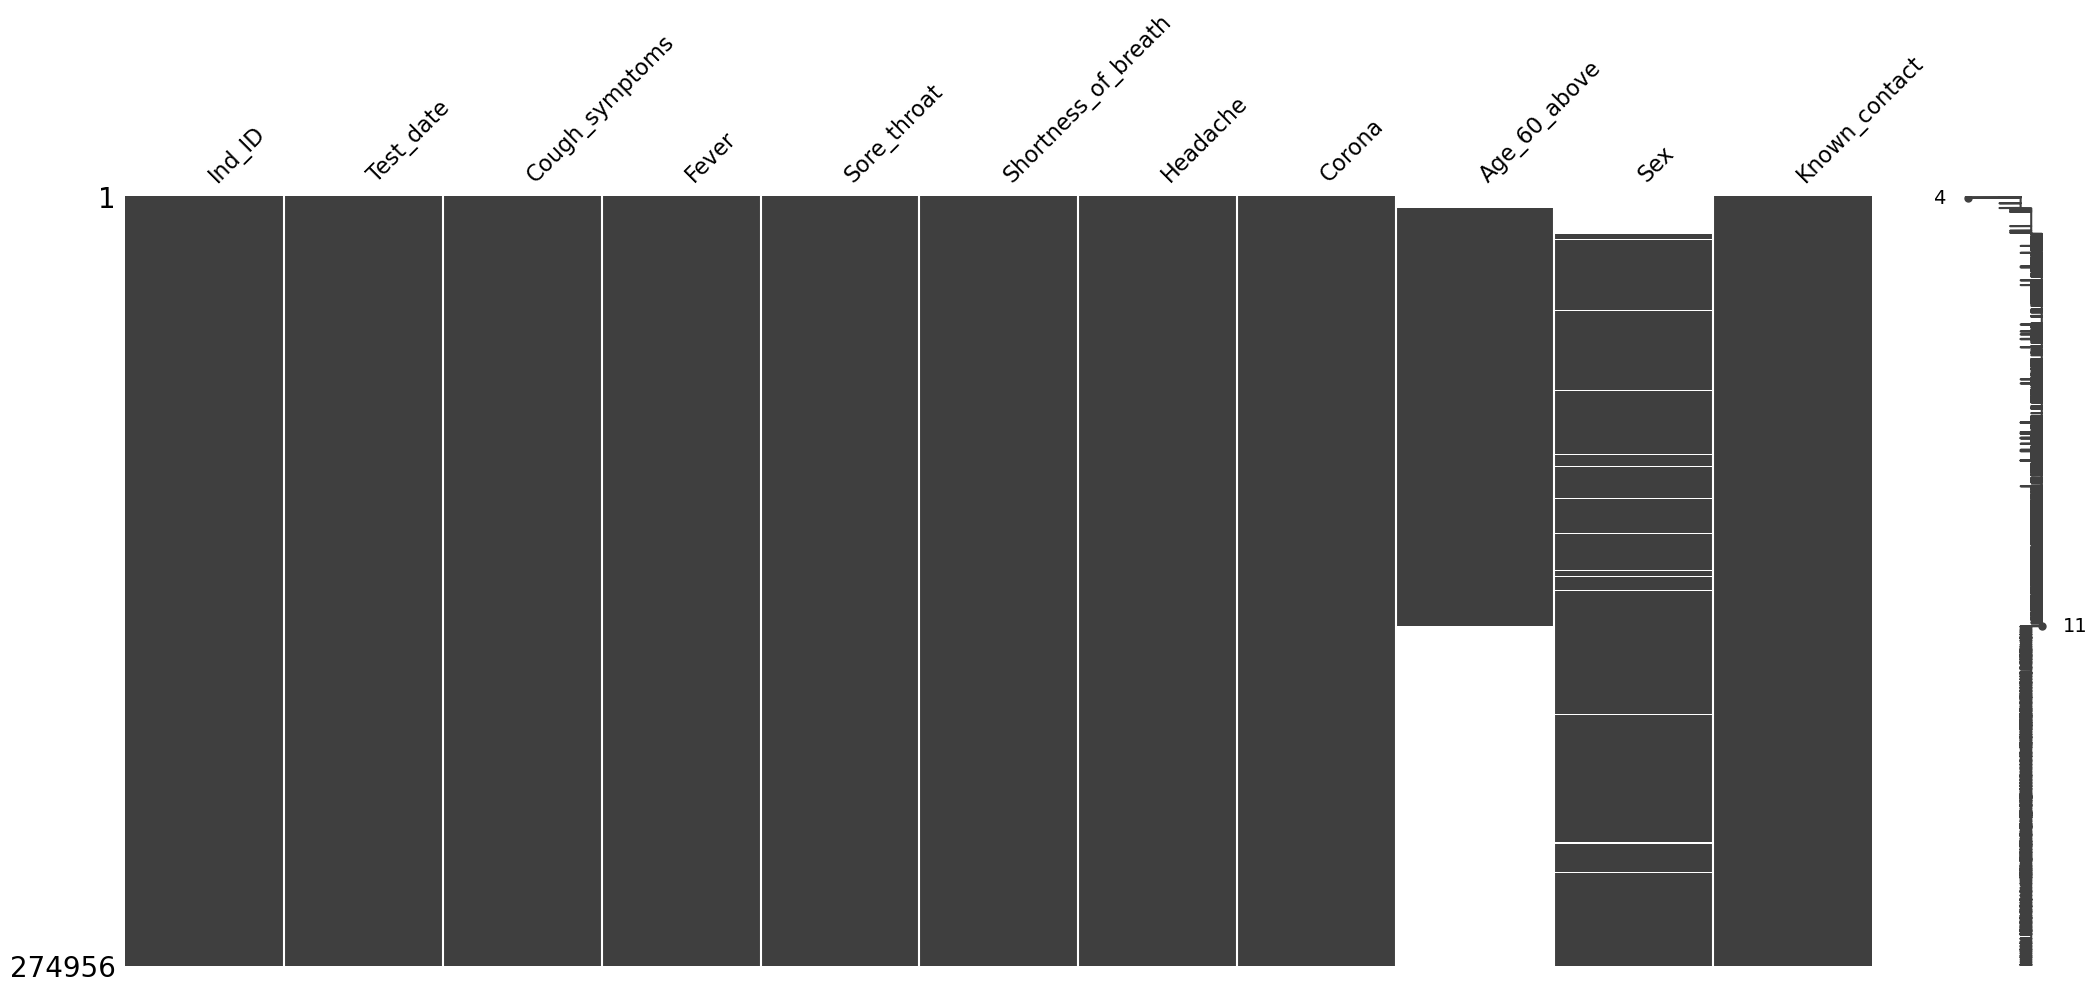

In [19]:
import missingno as msno   #finding corelation between missing datasets
msno.matrix(df)

In [20]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           125664
Sex                     19045
Known_contact               0
dtype: int64

In [21]:
df.shape

(274956, 11)

## d) Exploratory data analysis

In [22]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y')

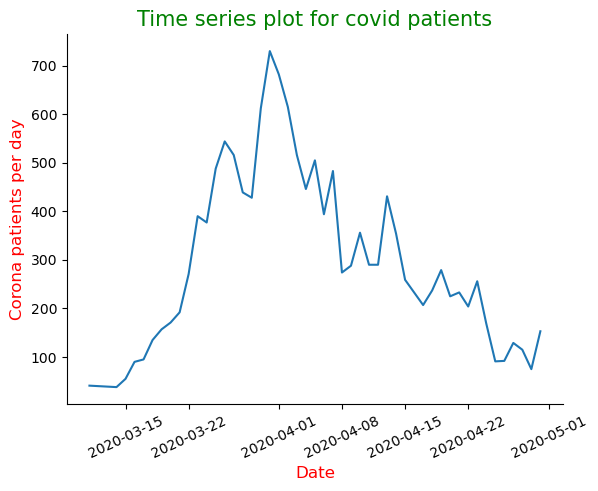

In [23]:
covid_count = df[df['Corona']=='positive'].groupby(['Test_date'])['Corona'].count().reset_index()

sns.lineplot(covid_count['Test_date'],covid_count['Corona'])

plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Corona patients per day',color='red',fontsize = 12)
plt.title('Time series plot for covid patients',color = 'green',fontsize = 15)
plt.xticks(rotation = 25)
plt.show()


**Number of covid patients increases exponentially for the month of May, then gradually decreases by the end of April** 

(array([18336., 18343., 18353., 18360., 18367., 18374.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

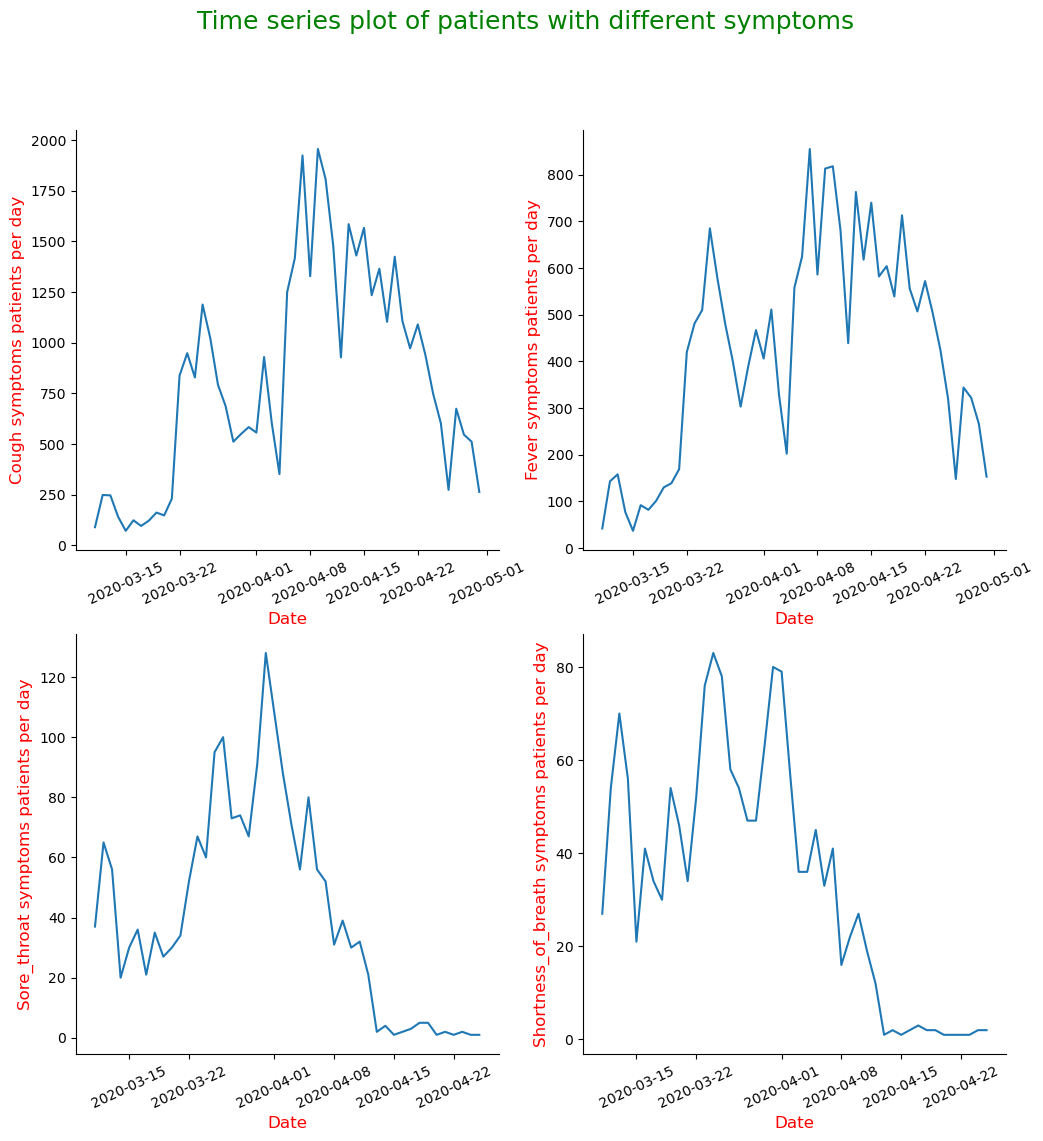

In [24]:
plt.figure(figsize=(12,12))
plt.suptitle("Time series plot of patients with different symptoms",color = 'green', fontsize = 18)

plt.subplot(221)
cough_count = df[df['Cough_symptoms']=='true'].groupby(['Test_date'])['Cough_symptoms'].count().reset_index()
sns.lineplot(covid_count['Test_date'],cough_count['Cough_symptoms'])
plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Cough symptoms patients per day',color='red',fontsize = 12)
plt.xticks(rotation = 25)

plt.subplot(222)
cough_count = df[df['Fever']=='true'].groupby(['Test_date'])['Fever'].count().reset_index()
sns.lineplot(covid_count['Test_date'],cough_count['Fever'])
plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Fever symptoms patients per day',color='red',fontsize = 12)
plt.xticks(rotation = 25)

plt.subplot(223)
cough_count = df[df['Sore_throat']=='true'].groupby(['Test_date'])['Sore_throat'].count().reset_index()
sns.lineplot(covid_count['Test_date'],cough_count['Sore_throat'])
plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Sore_throat symptoms patients per day',color='red',fontsize = 12)
plt.xticks(rotation = 25)

plt.subplot(224)
cough_count = df[df['Shortness_of_breath']=='true'].groupby(['Test_date'])['Shortness_of_breath'].count().reset_index()
sns.lineplot(covid_count['Test_date'],cough_count['Shortness_of_breath'])
plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Shortness_of_breath symptoms patients per day',color='red',fontsize = 12)
plt.xticks(rotation = 25)

**Patients with cough and fever symptoms are high even though covid cases are falling for the month of April**

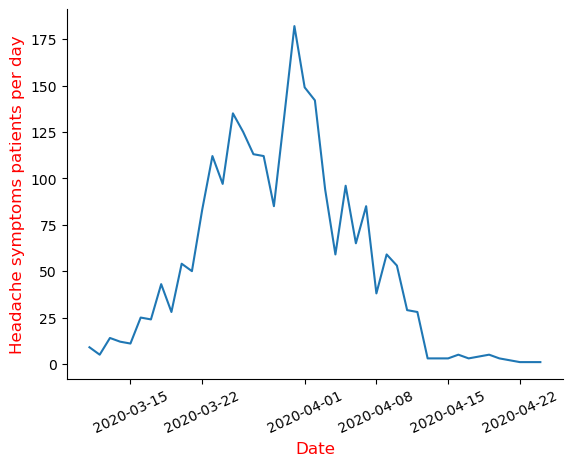

In [25]:
cough_count = df[df['Headache']=='true'].groupby(['Test_date'])['Headache'].count().reset_index()
sns.lineplot(covid_count['Test_date'],cough_count['Headache'])
plt.xlabel('Date',color='red',fontsize = 12)
plt.ylabel('Headache symptoms patients per day',color='red',fontsize = 12)
plt.xticks(rotation = 25)
plt.show()

**Patients with headache symptoms falls rapidly for the month of April**

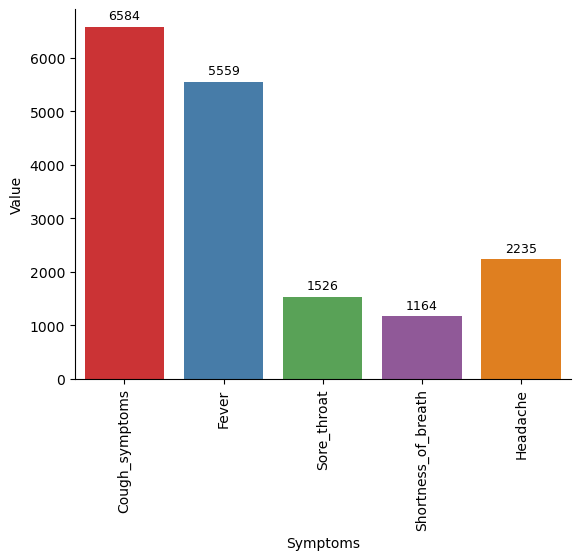

In [26]:
y1 = df[ (df['Corona']=='positive') & (df['Cough_symptoms']=='true') ]['Cough_symptoms'].count()
y2 = df[ (df['Corona']=='positive') & (df['Fever']=='true') ]['Fever'].count()
y3 = df[ (df['Corona']=='positive') & (df['Sore_throat']=='true') ]['Sore_throat'].count()
y4 = df[ (df['Corona']=='positive') & (df['Shortness_of_breath']=='true') ]['Shortness_of_breath'].count()
y5 = df[ (df['Corona']=='positive') & (df['Headache']=='true') ]['Headache'].count()

# Example time series data
X = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']
Y = [y1,y2,y3,y4,y5]

# Create a pandas dataframe from the time series data
temp_df = pd.DataFrame({'Value':Y ,'Symptoms': X})

ax = sns.barplot(x=temp_df['Symptoms'],y=temp_df['Value'],palette='Set1')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

**Top 3 symptom of covid positive patients are Cough, Fever and Headache**

Text(0, 0.5, 'Count')

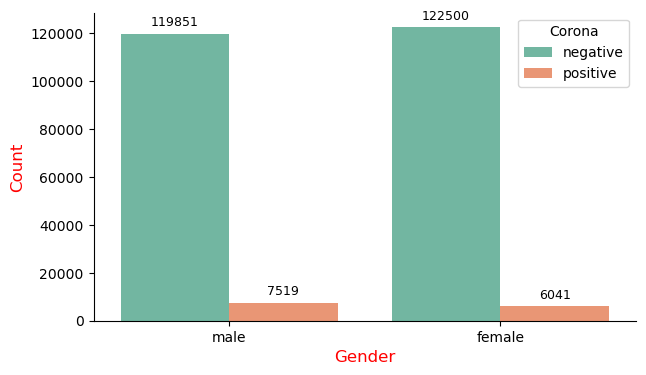

In [27]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x=df['Sex'],hue=df['Corona'],palette='Set2')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Gender',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

**Male and Female are equally affected by covid-19**

Text(0, 0.5, 'Count')

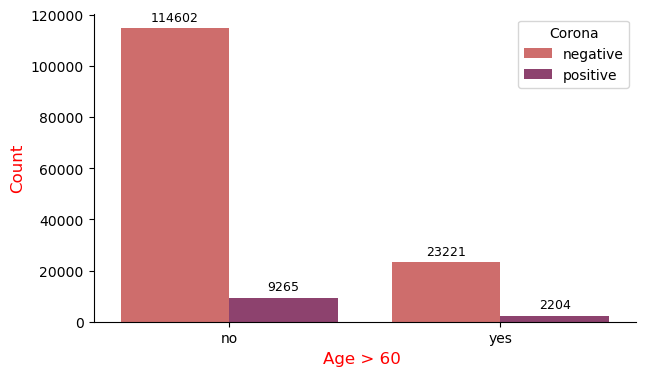

In [28]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x=df['Age_60_above'],hue=df['Corona'],palette='flare')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Age > 60 ',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

**There is no indication that covid affects elderly more than adults and children**

Text(0, 0.5, 'Count')

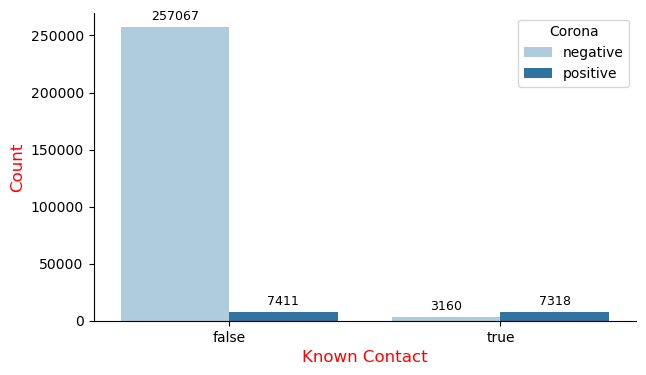

In [29]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x=df['Known_contact'],hue=df['Corona'],palette='Paired')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')

plt.xlabel('Known Contact',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)

**Risk of covid-19 infection is very high if comes in contact with covid positive patient**

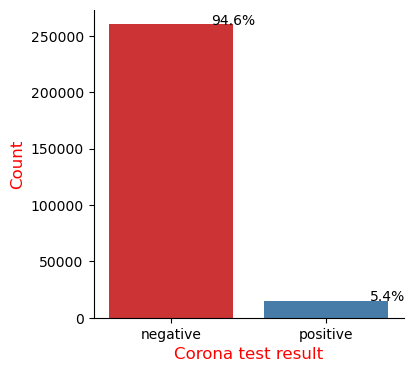

In [30]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df['Corona'],palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(df)))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.xlabel('Corona test result',color='red',fontsize = 12)
plt.ylabel('Count',color='red',fontsize = 12)
plt.show()

**Only 5.4 percent of total sample population having covid like symptoms actually test positive for it**

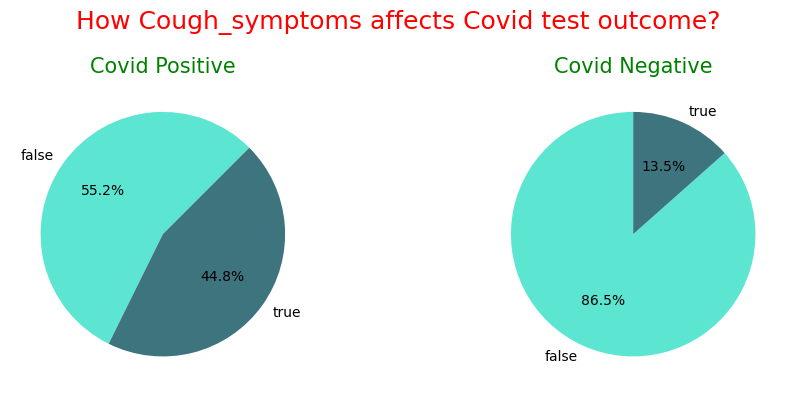

In [31]:
plt.figure(figsize=(10,4))
plt.suptitle("How Cough_symptoms affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#5ce6d2','#3e747e']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Cough_symptoms'].value_counts().index
sizes = df[df["Corona"]=='positive']['Cough_symptoms'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45, colors=colors)
plt.title('Covid Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Cough_symptoms'].value_counts().index
sizes = df[df["Corona"]=='negative']['Cough_symptoms'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Covid Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**There is 45% chance of covid-19 infection when affected by Cough**

**It is a very common symptom for covid infection**

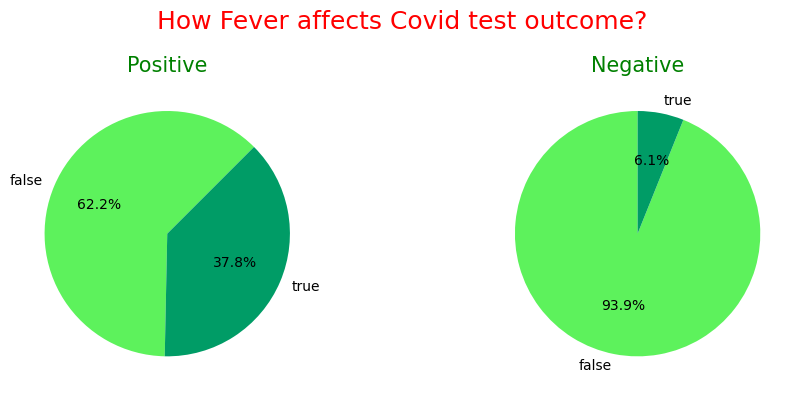

In [32]:
plt.figure(figsize=(10,4))
plt.suptitle("How Fever affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#5df25c','#009c66']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Fever'].value_counts().index
sizes = df[df["Corona"]=='positive']['Fever'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Fever'].value_counts().index
sizes = df[df["Corona"]=='negative']['Fever'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)
plt.title('Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**There is 38% chance of covid-19 infection when having Fever**

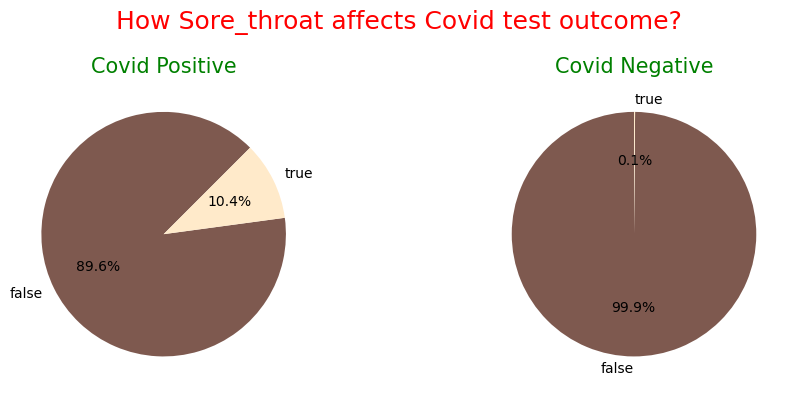

In [33]:
plt.figure(figsize=(10,4))
plt.suptitle("How Sore_throat affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#7e594f','#ffeaca']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Sore_throat'].value_counts().index
sizes = df[df["Corona"]=='positive']['Sore_throat'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Covid Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Sore_throat'].value_counts().index
sizes = df[df["Corona"]=='negative']['Sore_throat'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Covid Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Only 11% of covid-19 infection experience Sour throat**

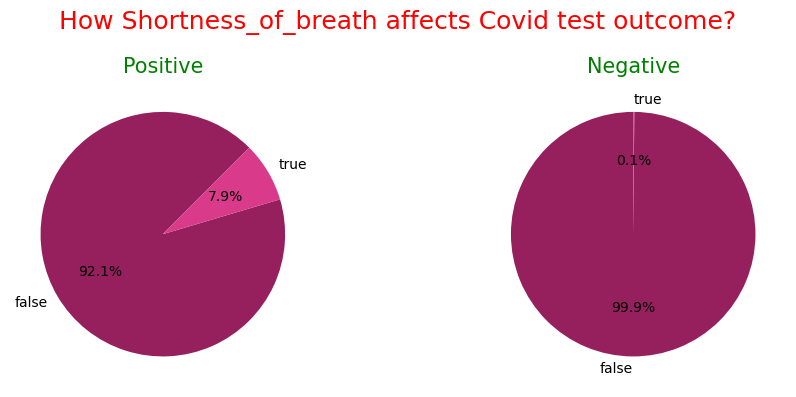

In [34]:
plt.figure(figsize=(10,4))
plt.suptitle("How Shortness_of_breath affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#95205d','#d93a89']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Shortness_of_breath'].value_counts().index
sizes = df[df["Corona"]=='positive']['Shortness_of_breath'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Shortness_of_breath'].value_counts().index
sizes = df[df["Corona"]=='negative']['Shortness_of_breath'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Only 8% of covid-19 infection experience Shortness of breath**

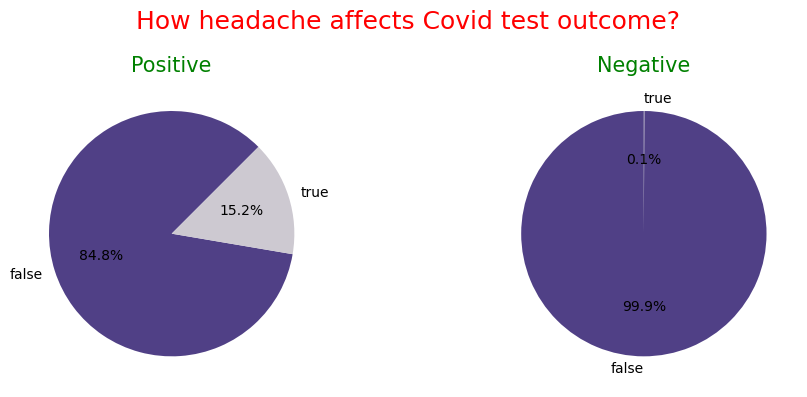

In [35]:
plt.figure(figsize=(10,4))
plt.suptitle("How headache affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#504086','#cdc9d1']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Headache'].value_counts().index
sizes = df[df["Corona"]=='positive']['Headache'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45,colors=colors)
plt.title('Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Headache'].value_counts().index
sizes = df[df["Corona"]=='negative']['Headache'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Only 15% of covid-19 infection experience headache**

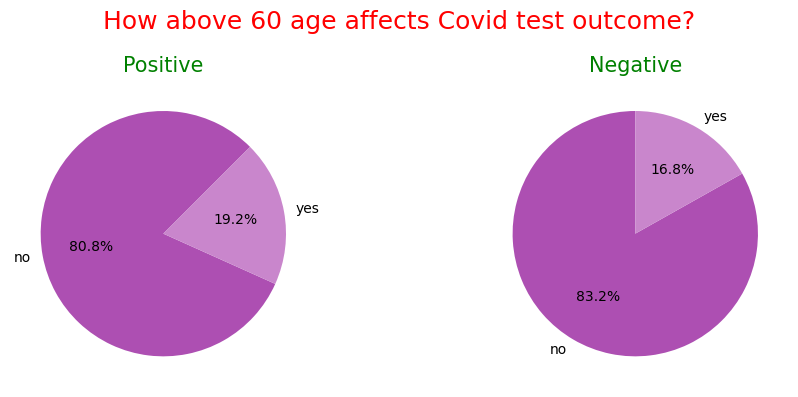

In [36]:
plt.figure(figsize=(10,4))
plt.suptitle("How above 60 age affects Covid test outcome?",color='red', fontsize = 18)

colors = ['#ad4fb2','#c986cc']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Age_60_above'].value_counts().index
sizes = df[df["Corona"]=='positive']['Age_60_above'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=45, colors=colors)
plt.title('Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Age_60_above'].value_counts().index
sizes = df[df["Corona"]=='negative']['Age_60_above'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.title('Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**Only 20% of covid-19 infection people are elderly**

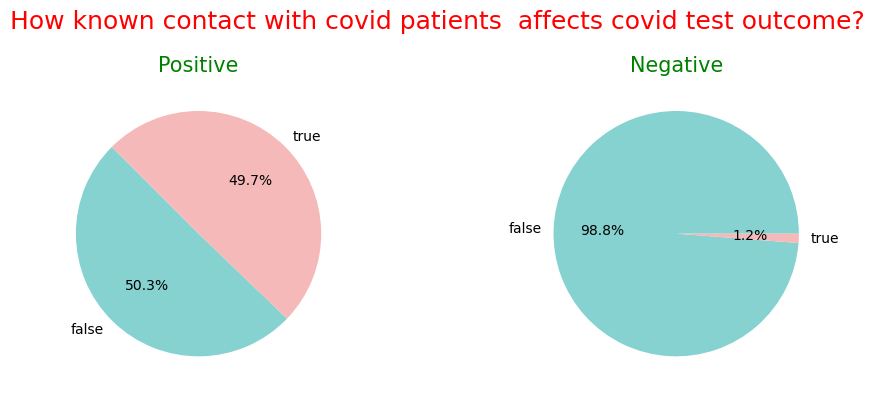

In [37]:
plt.figure(figsize=(10,4))
plt.suptitle("How known contact with covid patients  affects covid test outcome?",color = 'red', fontsize = 18)

colors = ['#85d2d0','#f4b9b8','#fff4bd']

plt.subplot(121)
labels = df[df["Corona"]=='positive']['Known_contact'].value_counts().index
sizes = df[df["Corona"]=='positive']['Known_contact'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=135,colors=colors)
plt.title('Positive',color = 'green',fontsize = 15)

plt.subplot(122)
labels = df[df["Corona"]=='negative']['Known_contact'].value_counts().index
sizes = df[df["Corona"]=='negative']['Known_contact'].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=False, startangle=0,colors=colors)
plt.title('Negative',color = 'green',fontsize = 15)

plt.tight_layout()
plt.show()

**If known contact with covid patient is true , then there is very high chance of covid infection**

In [38]:
df.shape

(274956, 11)

In [39]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,true,false,true,false,false,negative,NaN,NaN,false
1,2,2020-03-11,false,true,false,false,false,positive,NaN,NaN,false
2,3,2020-03-11,false,true,false,false,false,positive,NaN,NaN,false
3,4,2020-03-11,true,false,false,false,false,negative,NaN,NaN,false
4,5,2020-03-11,true,false,false,false,false,negative,NaN,NaN,true


## e) Feature Engineering

In [40]:
index_rem_null = df[ (df['Sore_throat'].isnull()) | (df['Shortness_of_breath'].isnull()) | (df['Headache'].isnull()) 
                   | (df['Cough_symptoms'].isnull()) | (df['Fever'].isnull()) | (df['Sex'].isnull()) ].index

df = df.drop(index_rem_null)

In [41]:
df['Cough_symptoms']=df.Cough_symptoms.map( {'false':0, 'true':1})
df['Fever']=df.Fever.map( {'false':0, 'true':1})
df['Sore_throat']=df.Sore_throat.map( {'false':0, 'true':1})
df['Shortness_of_breath']=df.Shortness_of_breath.map( {'false':0, 'true':1})
df['Headache']=df.Headache.map( {'false':0, 'true':1})

df['Sex']=df.Sex.map( {'female':0, 'male':1})
df['Age_60_above']=df.Age_60_above.map( {'no':0, 'yes':1})
df['Known_contact']=df.Known_contact.map( {'false':0, 'true':1})

df['Corona']=df.Corona.map( {'negative':0, 'positive':1})

In [42]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,2020-03-22,1,0,0,0,0,0,0.0,1,0
13728,13729,2020-03-22,1,0,0,0,0,0,0.0,0,0
13730,13731,2020-03-22,1,1,0,0,0,1,1.0,0,0
13734,13735,2020-03-22,0,0,0,0,0,0,0.0,1,0
13735,13736,2020-03-22,0,0,0,0,0,0,0.0,0,0


In [43]:
df['Age_60_above'] = df['Age_60_above'].fillna(df['Age_60_above'].mode()[0])

In [44]:
df1 =df.copy()

df1.shape

(255668, 11)

<AxesSubplot:>

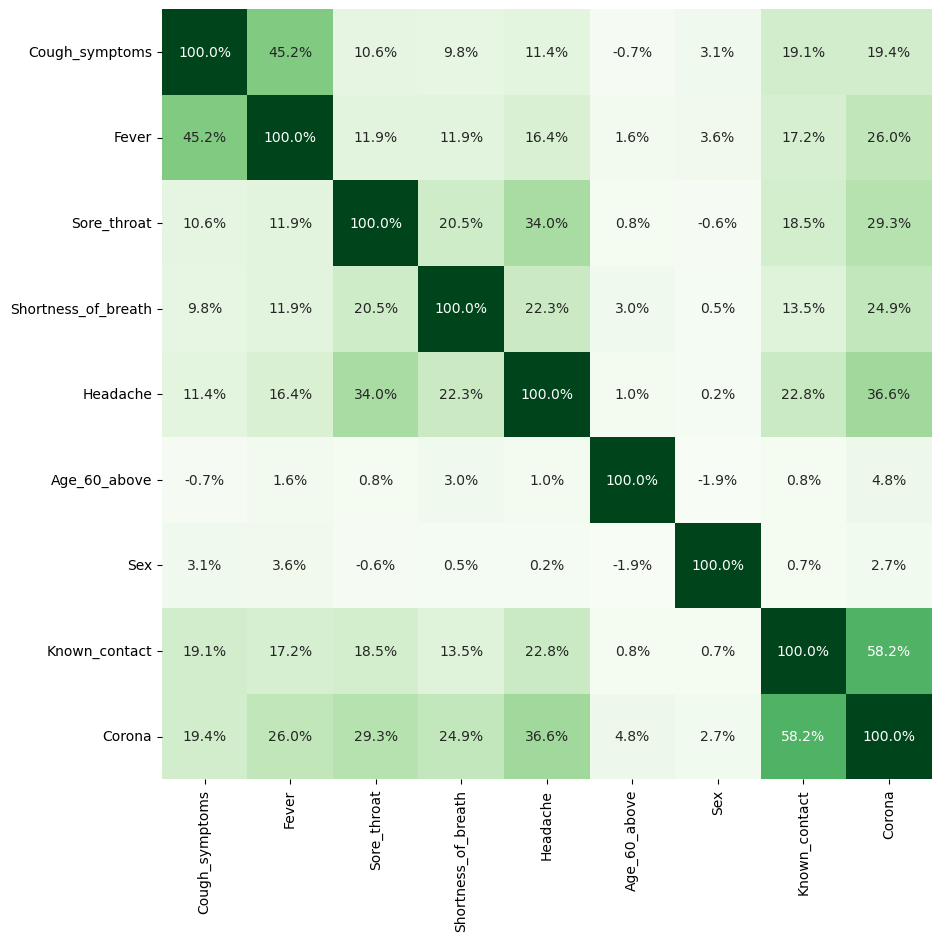

In [45]:
corr = df1[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact','Corona']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, fmt='.1%', annot=True, cmap='Greens')

**Observations**

Cough and Fever features are positively corelated with a corelation value of 45%

Corona is also positively corelated with Headache and Known contact with a corelation values of 36% and 58% percent respectively 

Sore Throat and Headache has a positive corelation value of 34%

Shortness of Breadth and Headache also has positive corelation value of 22%


## f)Train Test Split

In [46]:
x_train = df1[df1['Test_date']<'2020-04-15'].drop(['Ind_ID','Test_date','Corona'], axis = 1)
y_train = df1[df1['Test_date']<'2020-04-15']['Corona']

x_test = df1[df1['Test_date']>'2020-04-15'].drop(['Ind_ID','Test_date','Corona'], axis = 1)
y_test = df1[df1['Test_date']>'2020-04-15']['Corona']

In [47]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (136294, 8)
Shape of x_test:  (112363, 8)
Shape of y_train:  (136294,)
Shape of y_test (112363,)


In [48]:
from collections import Counter

from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTEENN
smenn = SMOTEENN()

x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 125668, 1: 10626})
After Counter({0: 76756, 1: 41297})


## g) Model Building

In [79]:
# To store results of models
result_dict_model = []
result_dict_train = []
result_dict_test = []

### 1) Gradient Boosting

In [80]:
gb1 = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gb1, x_train, y_train, cv=5)
gb1.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gb1.score(x_test,y_test))

Train Score: 0.9576796524845405
Test Score: 0.9839537926185666


In [81]:
result_dict_model.append("GB Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(gb1.score(x_test,y_test))

### 2) Decision Tree

In [82]:
dt = DecisionTreeClassifier()
accuracies = cross_val_score(dt, x_train, y_train, cv=5)
dt.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dt.score(x_test,y_test))

Train Score: 0.9575255727788153
Test Score: 0.9839537926185666


In [83]:
result_dict_model.append("DT Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(dt.score(x_test,y_test))

### 3) Random Forest

In [84]:
rf = RandomForestClassifier()
accuracies = cross_val_score(rf, x_train, y_train, cv=5)
rf.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf.score(x_test,y_test))

Train Score: 0.9576576414056307
Test Score: 0.9839537926185666


In [85]:
result_dict_model.append("RF Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(rf.score(x_test,y_test))

### 4) Logistic Regression

In [86]:
lr_model = LogisticRegression()
accuracies = cross_val_score(lr_model, x_train, y_train, cv=5)
lr_model.fit(x_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(x_test,y_test))

Train Score: 0.9508341477262953
Test Score: 0.9815508663884018


In [87]:
result_dict_model.append("LR Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(lr_model.score(x_test,y_test))

## 5) K-Nearest Neighbour

In [88]:
knn_model = KNeighborsClassifier()

accuracies = cross_val_score(knn_model, x_train, y_train, cv=5)
knn_model.fit(x_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn_model.score(x_test,y_test))

Train Score: 0.8594148540910332
Test Score: 0.9855557434386765


In [89]:
result_dict_model.append("KNN Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(knn_model.score(x_test,y_test))

### 6) Naive Bayes

In [90]:
nb = GaussianNB()

accuracies = cross_val_score(nb, x_train, y_train, cv=5)
nb.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb.score(x_test,y_test))

Train Score: 0.9549576227244495
Test Score: 0.9855201445315629


In [91]:
result_dict_model.append("NB Default")
result_dict_train.append(np.mean(accuracies))
result_dict_test.append(nb.score(x_test,y_test))

## h) Model Evaluation (on imbalanced dataset)

In [92]:
model_df = pd.DataFrame({'Model':result_dict_model ,'Train_Score': result_dict_train, 'Test_Score':result_dict_test})

model_df.sort_values( by=['Test_Score','Train_Score'], ascending=False).reset_index()

,index,Model,Train_Score,Test_Score
0,4,KNN Default,0.859415,0.985556
1,5,NB Default,0.954958,0.985520
2,0,GB Default,0.957680,0.983954
3,2,RF Default,0.957658,0.983954
4,1,DT Default,0.957526,0.983954
5,3,LR Default,0.950834,0.981551


## Observations:

1. Even though KNN has the highest accuracy on testing set among all, it has a high computation cost.


2. Naive Bayes is faster at computation and also has a excellent accuracy both on testing as well as training set.


3. Both Gradient Boosting and Random Forest are equally good but takes longer computation time than Naive Bayes.


4. All these model has low recall score for minority label , since our priority is to treat every patient with covid
   we will try to improve the recall and f1 score


5. Further evaluation needs to be done on precision, recall and auc curve to select the best Machine learning model for this dataset

## Model Evaluation (on balanced dataset using SMOTEENN)

### 1) Gradient Boosting

In [93]:
# Applying SmoteENN on Gradient Boosting

#Here upsampling is selected over downsampling , so that we dont lose any valuable information from the dataset 
#which might affect our model accuracy and prediction

#We go with  SMOTEENN since it gives better result than SMOTE by cleaning the miscalssified data points

gb2 = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gb2, x_train_smenn, y_train_smenn, cv=5)
gb2.fit(x_train_smenn,y_train_smenn)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gb2.score(x_test,y_test))

Train Score: 0.9998903375167538
Test Score: 0.9855201445315629


In [94]:
y_pred = gb2.predict(x_test)
y_prob = gb2.predict_proba(x_test)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[109231    485]
 [  1142   1505]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363

AUC-ROC
0.8072065387956401


### 2) Naive Bayes

In [95]:
nb2 = GaussianNB()

accuracies = cross_val_score(nb2, x_train_smenn, y_train_smenn, cv=5)
nb2.fit(x_train_smenn,y_train_smenn)

print("Train Score:",np.mean(accuracies))
print("Test Score:",nb2.score(x_test,y_test))

Train Score: 0.9998903375167538
Test Score: 0.9855201445315629


In [96]:
y_pred = nb2.predict(x_test)
y_prob = nb2.predict_proba(x_test)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[109231    485]
 [  1142   1505]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363

AUC-ROC
0.8103659080628307


### 3) Random Forest

In [97]:
rf2 = RandomForestClassifier()
accuracies = cross_val_score(rf2, x_train_smenn, y_train_smenn, cv=5)
rf2.fit(x_train_smenn,y_train_smenn)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rf2.score(x_test,y_test))

Train Score: 1.0
Test Score: 0.970426207915417


In [98]:
y_pred = rf2.predict(x_test)
y_prob = rf2.predict_proba(x_test)

print('Confusion Matrix')
print('='*60)
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred))

print('AUC-ROC')
print('='*60)
print(roc_auc_score(y_test, y_prob[:,1]))

Confusion Matrix
[[107466   2250]
 [  1073   1574]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    109716
           1       0.41      0.59      0.49      2647

    accuracy                           0.97    112363
   macro avg       0.70      0.79      0.74    112363
weighted avg       0.98      0.97      0.97    112363

AUC-ROC
0.8003263927089541


### Observations

1)We obtain better recall values with balanced dataset using SMOTEENN for all our machine learning models

2)Guassian Naive Bayes not only gives us highest accuracy but also gives higher recall value than other machine learning models

3)AUC-ROC for Naive Bayes is highest among all.


# SQL

### Use MySQL or PyMySQL to perform the below queries.

In [140]:
import pymysql

In [141]:
# To connect MySQL database
conn = pymysql.connect(
    host='localhost',
    user='root', 
    password = "ErlingHaaland#9",
    db='Covid_19',)

cur = conn.cursor()

### Questionnaire

1)    Find the number of corona patients who faced shortness of breath.

2)    Find the number of negative corona patients who have fever and sore_throat. 

3)    Group the data by month and rank the number of positive cases.

4)    Find the female negative corona patients who faced cough and headache.

5)    How many elderly corona patients have faced breathing problems?

6)    Which three symptoms were more common among COVID positive patients?

7)    Which symptom was less common among COVID negative people?

8)    What are the most common symptoms among COVID positive males whose known contact was abroad? 


#### 1) Find the number of corona patients who faced shortness of breath.

In [144]:
query = """SELECT COUNT(*) AS totalpatients
            FROM covid_19_dataset_clean
            WHERE Corona='positive' and  Shortness_of_breath='True'"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(1164,)


#### 2) Find the number of negative corona patients who have fever and sore_throat.

In [145]:
query = """SELECT COUNT(*) AS totalpatients
            FROM covid_19_dataset_clean
            WHERE Corona='positive' and  Fever='True' and Sore_throat='True'"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(771,)


#### 3) Group the data by month and rank the number of positive cases.

In [146]:
query = """SELECT MONTHNAME(STR_TO_DATE(Test_date,'%d-%m-%Y')) AS month_name, COUNT(Ind_ID) AS totalpatients
FROM covid_19_dataset_clean
WHERE Corona='positive'
GROUP BY MONTHNAME(STR_TO_DATE(Test_date,'%d-%m-%Y'))
ORDER BY totalpatients DESC;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('April', 8881)
('March', 5847)


#### 4) Find the female negative corona patients who faced cough and headache.

In [147]:
query = """SELECT COUNT(*) AS totalpatients
            FROM covid_19_dataset_clean
            WHERE Corona='positive' and Sex='female'and Cough_symptoms='true' and Headache='true'"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(597,)


#### 5) How many elderly corona patients have faced breathing problems?

In [148]:
query = """SELECT COUNT(*) AS totalpatients
            FROM covid_19_dataset_clean
            WHERE Corona='positive' and Age_60_above='yes'and Shortness_of_breath='true'"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

(296,)


####  6) Which three symptoms were more common among COVID positive patients?

In [149]:
query= """SELECT 'Headache' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Headache='true'

UNION ALL

SELECT 'Fever' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Fever='true'

UNION ALL

SELECT 'Cough_symptoms' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Cough_symptoms='true'

UNION ALL

SELECT 'Sore_throat' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Sore_throat='true'

UNION ALL

SELECT 'Shortness_of_breath' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Shortness_of_breath='true'
ORDER BY total DESC
LIMIT 3;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('Cough_symptoms', 6616)
('Fever', 5591)
('Headache', 2235)


#### 7) Which symptom was less common among COVID negative people?

In [150]:
query = """SELECT 'Headache' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='negative' and Headache='true'

UNION ALL

SELECT 'Fever' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='negative' and Fever='true'

UNION ALL

SELECT 'Cough_symptoms' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='negative' and Cough_symptoms='true'

UNION ALL

SELECT 'Sore_throat' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='negative' and Sore_throat='true'

UNION ALL

SELECT 'Shortness_of_breath' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='negative' and Shortness_of_breath='true'
ORDER BY total;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('Headache', 6)
('Shortness_of_breath', 11)
('Sore_throat', 14)
('Fever', 1002)
('Cough_symptoms', 2298)


#### 8) What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [151]:
query = """SELECT 'Headache' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Headache='true' and Known_contact='Abroad' and Sex='male'

UNION ALL

SELECT 'Fever' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Fever='true' and Known_contact='Abroad' and Sex='male'

UNION ALL

SELECT 'Cough_symptoms' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Cough_symptoms='true' and Known_contact='Abroad' and Sex='male'

UNION ALL

SELECT 'Sore_throat' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Sore_throat='true' and Known_contact='Abroad' and Sex='male'

UNION ALL

SELECT 'Shortness_of_breath' AS Symptoms,COUNT(*) AS total
FROM covid_19_dataset_clean
WHERE  Corona='positive' and Shortness_of_breath='true' and Known_contact='Abroad' and Sex='male'
ORDER BY total DESC;"""

cur.execute(query)
output = cur.fetchall()

for row in output:
    print(row)

('Cough_symptoms', 742)
('Fever', 610)
('Headache', 209)
('Sore_throat', 156)
('Shortness_of_breath', 150)
